In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer

import importlib

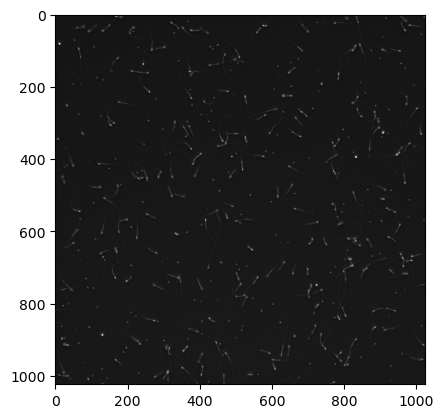

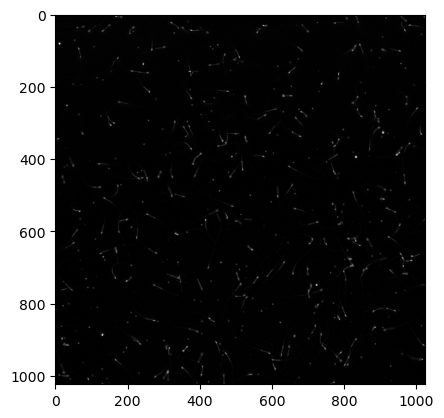

uint8 uint8


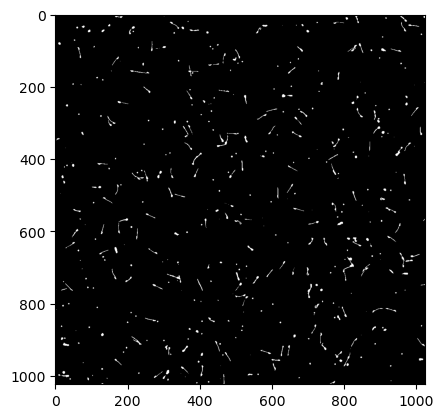

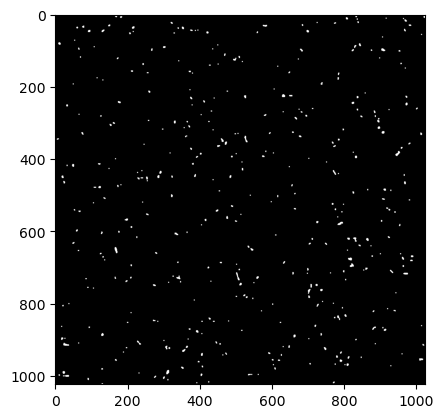

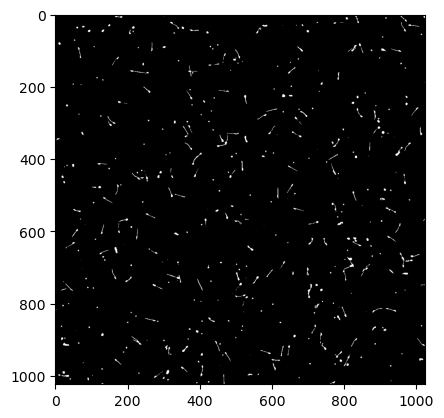

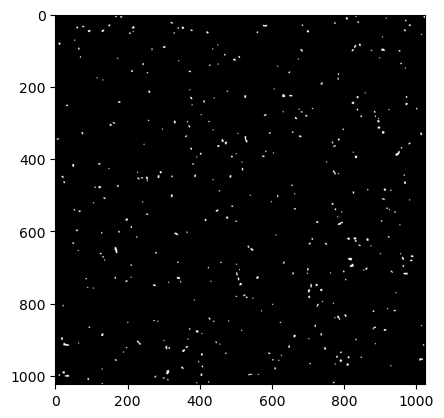

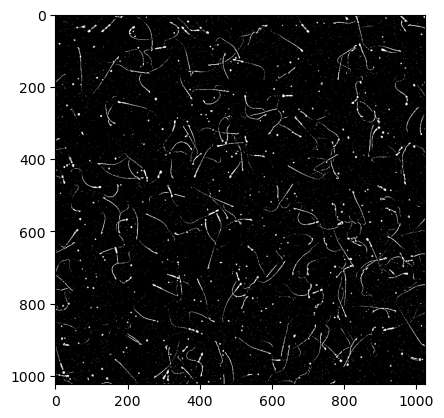

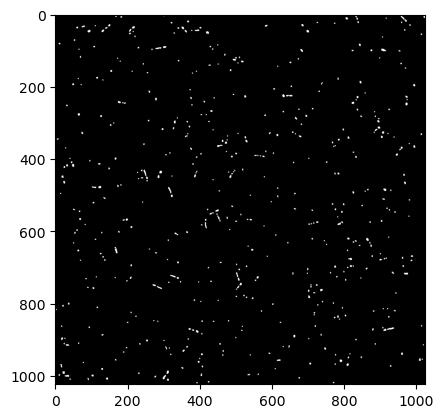

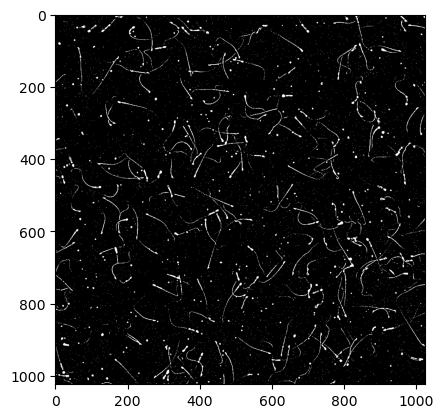

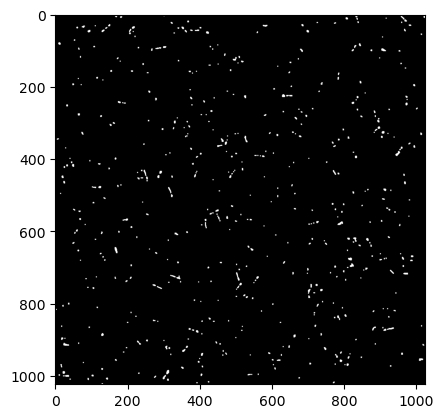

In [18]:
importlib.reload(tracker)

videofile = "ExampleVideos/10X_LD_1024_R1.avi"
#videofile = "ExampleVideos/20X_MD_R5.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame); plt.show()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mid_val = np.median(gray)
plt.imshow(np.abs(gray-mid_val),cmap='gray'); plt.show()

# Test thresholding
global_im = tracker.threshold(frame,'global',global_thresh=50)
otsu_im = tracker.threshold(frame,'otsu')
adaptive_im = tracker.threshold(frame,'adaptive')
hybrid_im = tracker.threshold(frame,'hybrid',global_thresh=50)


plt.imshow(global_im,cmap='gray'); plt.show()
plt.imshow(cv2.morphologyEx(global_im, cv2.MORPH_OPEN, np.ones((3,3),np.uint8)),cmap='gray'); plt.show()

plt.imshow(otsu_im,cmap='gray'); plt.show()
plt.imshow(cv2.morphologyEx(otsu_im, cv2.MORPH_OPEN, np.ones((3,3),np.uint8)),cmap='gray'); plt.show()

plt.imshow(adaptive_im,cmap='gray'); plt.show()
plt.imshow(cv2.morphologyEx(adaptive_im, cv2.MORPH_OPEN, np.ones((3,3),np.uint8)),cmap='gray'); plt.show()

plt.imshow(hybrid_im,cmap='gray'); plt.show()
plt.imshow(cv2.morphologyEx(hybrid_im, cv2.MORPH_OPEN, np.ones((3,3),np.uint8)),cmap='gray'); plt.show()


### Feed through the tracking pipeline

In [9]:
importlib.reload(tracker)

centroids_list, segmentations_list, bboxs_list, areas_list = tracker.processVideo(videofile)
mappings = tracker.trackCentroids(centroids_list)
track_data = tracker.generateTrackingData(mappings, centroids_list, segmentations_list, bboxs_list, areas_list)

  6%|▌         | 28/500 [00:04<00:54,  8.61it/s]

 21%|██        | 103/500 [00:15<00:45,  8.67it/s]

 82%|████████▏ | 408/500 [00:57<00:10,  8.86it/s]

 98%|█████████▊| 489/500 [01:06<00:01,  8.55it/s]

100%|██████████| 500/500 [00:00<00:00, 673.37it/s]


### Feed through the statistics pipeline

In [12]:
importlib.reload(stats)

stats_data = {}

# Calculate each statstic for each sperm
for i in range(len(track_data)):
    # Get the centroids
    centroids = track_data[i]['centroid']
    visible = track_data[i]['visible']

    average_speed = stats.calcAverageSpeed(centroids,visible)

    stats_data[i] = {}
    stats_data[i]["average_speed"] = average_speed

### Use Visualizations

In [13]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, track_data, stats_data, visualization="segments")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed